### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [4]:
df = pd.read_excel('https://github.com/RanggaRijasa/DataMining2024/raw/refs/heads/main/Supermarket-December-2017.xlsx')
df.head()

# Loads the dataset and display the first 5 rows

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [6]:
df.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,NO_ORD,SLD_AK,SLD_AKG,QTY,...,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,FILLER,SUPPLIER,DEP_SWA,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,0.0,11769.000000,9350.000000,148486.000000,...,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,1.484860e+05,7264.000000,1668.000000,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,NaN,20.819228,15.819209,3.163174,...,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,1.717615e+11,313.185573,1.182854,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,70.033381,54.576439,16.266576,...,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,-12.000000,-12.000000,1.000000,...,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.701010e+11,0.000000,1.000000,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,NaN,0.000000,0.000000,1.000000,...,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,1.701077e+11,8.000000,1.000000,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,NaN,3.000000,2.000000,1.000000,...,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,1.701160e+11,69.000000,1.000000,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,NaN,13.000000,11.000000,2.000000,...,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,1.701251e+11,444.000000,1.000000,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,NaN,2663.000000,1748.000000,2000.000000,...,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,7.013157e+11,1769.000000,2.000000,0.0


In [7]:
df.isnull().sum()

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64

In [8]:
df.isnull().sum()/len(df) * 100

KD_SBR       0.002020
TP_TRN       0.002020
KDSUP       72.501667
KAS          8.212730
TRN_DK       0.002020
              ...    
TP_ADJ       6.339190
USER         0.002020
TANGGAL      0.002020
JAM          0.002020
LAMA_CRD    99.975082
Length: 61, dtype: float64

In [9]:
cleaned_df = df

important_columns = ['ITEM', 'NO_BKT', 'KEL', 'QTY', 'JLH_TRANS', 'TANGGAL', 'JAM', 'USER'] 
if all(col in cleaned_df.columns for col in important_columns):
    cleaned_df = cleaned_df[important_columns]

In [10]:
cleaned_df.isnull().sum()

ITEM         3
NO_BKT       3
KEL          3
QTY          3
JLH_TRANS    3
TANGGAL      3
JAM          3
USER         3
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

cleaned_df = pd.DataFrame(imputer.fit_transform(cleaned_df), columns=cleaned_df.columns)

cleaned_df.isnull().sum()

ITEM         0
NO_BKT       0
KEL          0
QTY          0
JLH_TRANS    0
TANGGAL      0
JAM          0
USER         0
dtype: int64

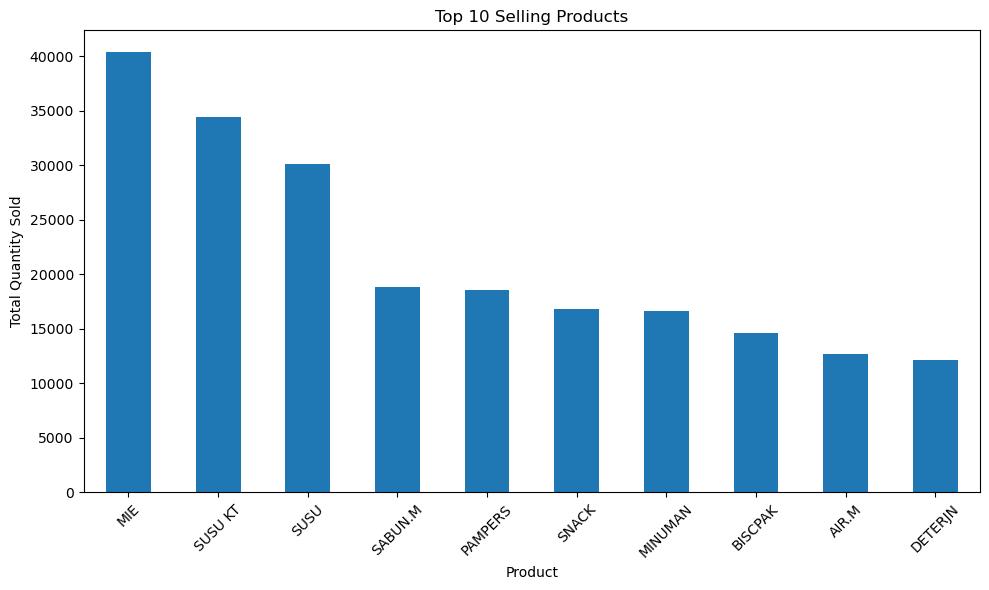

In [12]:
from matplotlib import pyplot as plt

top_products = cleaned_df.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight : 
From the visualization above, we can see that indomie is the most sold product with around 40k qty sold.

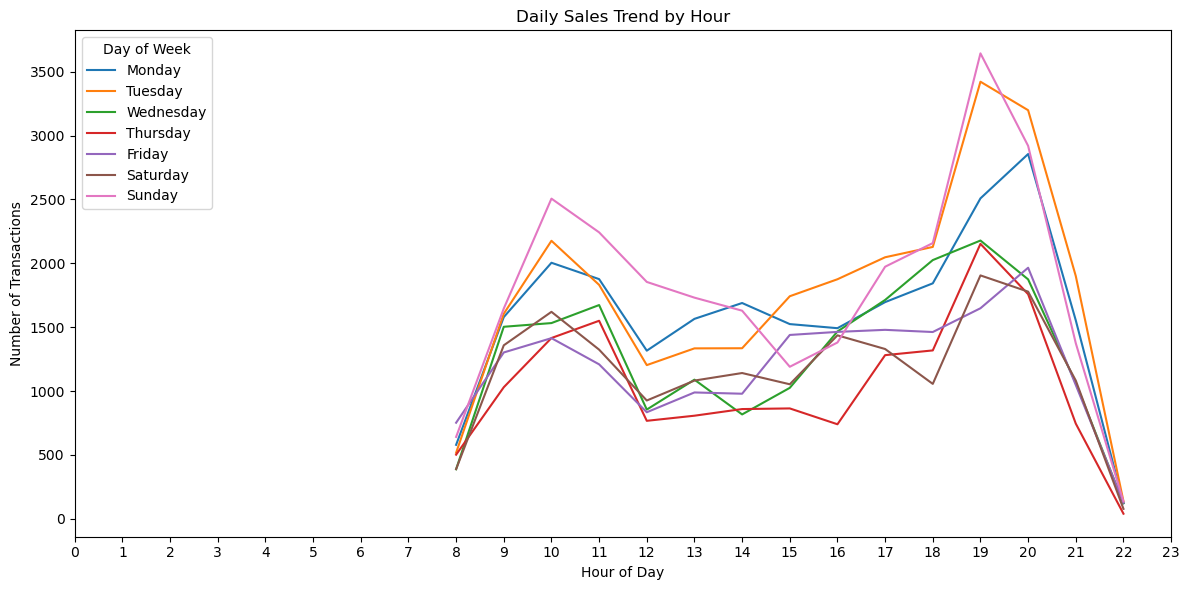

In [ ]:
cleaned_df['TANGGAL'] = pd.to_datetime(cleaned_df['TANGGAL'], errors='coerce')
cleaned_df['HOUR'] = pd.to_datetime(cleaned_df['JAM'], errors='coerce').dt.hour
cleaned_df['DAY_NAME'] = cleaned_df['TANGGAL'].dt.day_name()

daily_hourly_sales = cleaned_df.groupby(['DAY_NAME', 'HOUR'])['NO_BKT'].count().reset_index()
daily_hourly_sales = daily_hourly_sales.pivot(index='HOUR', columns='DAY_NAME', values='NO_BKT').fillna(0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]

daily_hourly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24)) 
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

Insisght :
From the visualization above, the peak hour is between 7-8 PM, followed by 9-10 AM. That could happen because people go to the market before or after they work. And the highest transactions is at sunday because most people is not working in sunday. Before 8 AM and after 10 PM there are no transactions because the market is closed.

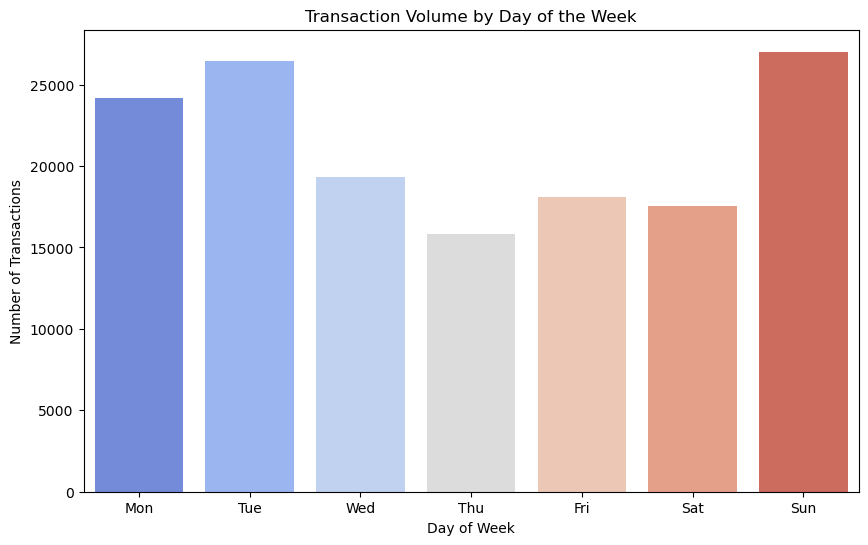

In [53]:
daily_transactions = cleaned_df.groupby(cleaned_df['TANGGAL'].dt.weekday)['NO_BKT'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_transactions.index, y=daily_transactions.values, palette="coolwarm")
plt.title('Transaction Volume by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Insight : The visualization above prove that sunday is the day that has highest number of transactions, while thursday is the lowest. This could happen because in thursday most people are focusing on their job remembering it is mid-week. It can also happen because people already stock their needs in between sunday-tuesday so in weekday they can focus on their job.

In [35]:
apriori_data = pd.crosstab(cleaned_df['NO_BKT'], cleaned_df['KEL'])
apriori_data.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

c:\Users\edwar\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [40]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

c:\Users\edwar\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
1,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
2,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
3,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
4,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
5,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
6,(SUSU KT),(DETERJN),0.166530,0.083607,0.023997,0.144100,1.723545,0.010074,1.070678,0.503678
7,(DETERJN),(SUSU KT),0.083607,0.166530,0.023997,0.287022,1.723545,0.010074,1.168998,0.458101
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667


### Conclusions

- "P GIGI" (toothpaste) and "SABUN.M" (soap) have a high lift value (6.12), indicating customers often buy them together.
- The combination of "P GIGI" and "SABUN.M" strongly predicts the purchase of "SHAMPOO" with a lift of 7.16, suggesting a well-defined product group.
- "SOFTENR" and "DETERJN" have a very strong association (lift = 7.70), showing customers frequently purchase them together.
- "SNACK" and "BISCPAK" have a robust mutual association (lift > 5), highlighting their complementary nature.

### Recommendations
#### 1. Product Placement and Store Layout
- Group "P GIGI," "SABUN.M," and "SHAMPOO" together in the same aisle or a dedicated personal care section.
- Use signage to direct customers to these combinations: "Get your complete personal care essentials here!"
- Place "DETERJN" and "SOFTENR" next to each other in the laundry care aisle.
- Highlight complementary products with labels like “Frequently Bought Together.”

#### 2. Promotional Strategies
- Offer discounts or incentives for buying associated items together such as bundling or discounted price.
- Create snack bundles featuring "SNACK" and "BISCPAK" for quick grab-and-go options.

#### 4. Inventory Management
- Ensure products with high lift values, like "SOFTENR" and "DETERJN," are consistently in stock to prevent lost sales opportunities.
- Anticipate increased demand for complementary products and adjust inventory levels accordingly.